<a href="https://colab.research.google.com/github/lordavalo/Portifolio/blob/main/Tokyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Tokyo*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Tokyo, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Tokyo (good for visualisations).*


In [23]:
#Importação de Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [24]:
#importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2021-02-25/visualisations/listings.csv")

## Análise dos Dados
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas e as 5 últimas.

In [25]:
#ver as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,11000,3,165,2020-03-04,1.44,1,328
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7428,3,228,2020-01-18,2.27,1,146
2,899003,"Classy room @Shinjuku, Takadanoba",4799233,Yu,NaN,Shinjuku Ku,35.70865,139.69681,Entire home/apt,5200,30,93,2019-11-25,0.95,2,0
3,1016831,WOMAN ONLY LICENSED ! Cosy & Cat behnd Shibuya,5596383,Wakana,NaN,Setagaya Ku,35.65833,139.67153,Private room,11000,1,211,2020-03-16,2.19,1,139
4,1033276,private room @Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74253,139.79730,Private room,30000,1,72,2018-06-17,0.76,2,271


In [26]:
#ver as 5 últimas entradas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11303,48245895,有民宿许可、新宿駅徒歩圏、有付费停车位,49474412,Dong,NaN,Shinjuku Ku,35.69420,139.69182,Entire home/apt,5000,2,0,NaN,NaN,8,292
11304,48248681,【宿家】千束町 浅草 酉の市 鷲神社の裏にある一軒家,176875986,Yadoya,NaN,Taito Ku,35.72089,139.79126,Entire home/apt,10309,1,0,NaN,NaN,35,0
11305,48248916,新宿Shinjuku-ku 4bedroom豪华公寓， 新大久保駅徒歩２分,43826309,Momo,NaN,Shinjuku Ku,35.70376,139.70007,Entire home/apt,28000,1,0,NaN,NaN,22,178
11306,48258253,Near to Sensoji Temple.Japanese traditional h...,34415001,Cheng,NaN,Taito Ku,35.71585,139.79975,Entire home/apt,20000,3,0,NaN,NaN,5,132
11307,48260803,STUDIO APARTMENT in GREAT LOCATION / SHINJUKU,165921683,Tokyo,NaN,Shinjuku Ku,35.69769,139.70470,Entire home/apt,2271,1,0,NaN,NaN,8,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [27]:
#quantidade de dados do DataFrame
print("Quantidade colunas:{}".format(df.shape[1]))
print("Quantidade de linhas:{}".format(df.shape[0]))

Quantidade colunas:16
Quantidade de linhas:11308


In [28]:
# Mostrar quantidade de itens do DataFraame detalhado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11308 entries, 0 to 11307
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11308 non-null  int64  
 1   name                            11308 non-null  object 
 2   host_id                         11308 non-null  int64  
 3   host_name                       11290 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   11308 non-null  object 
 6   latitude                        11308 non-null  float64
 7   longitude                       11308 non-null  float64
 8   room_type                       11308 non-null  object 
 9   price                           11308 non-null  int64  
 10  minimum_nights                  11308 non-null  int64  
 11  number_of_reviews               11308 non-null  int64  
 12  last_review                     

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem aproximadamente 18% dos valores nulos.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [29]:
#Ordenar em ordem decrescente
df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               11308
reviews_per_month                  2107
last_review                        2107
host_name                            18
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
host_id                               0
name                                  0
id                                    0
dtype: int64

In [30]:
#Ordenar em ordem decrescente em porcentagem
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.186328
last_review                       0.186328
host_name                         0.001592
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

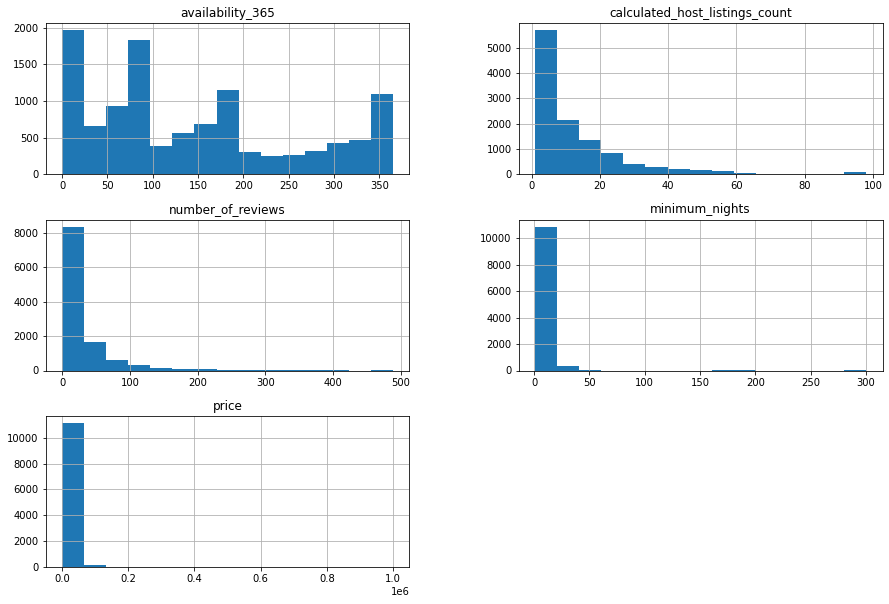

In [31]:
#plotar histograma das variáveis númericas
df[["availability_365", "calculated_host_listings_count", "number_of_reviews", "minimum_nights", "price"]].hist(bins=15, figsize=(15, 10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [32]:
# Resumo estatistico numéricos
df[["availability_365", "calculated_host_listings_count", "number_of_reviews", "minimum_nights", "price"]].describe()

,availability_365,calculated_host_listings_count,number_of_reviews,minimum_nights,price
count,11308.000000,11308.000000,11308.000000,11308.000000,11308.000000
mean,144.371418,12.509904,26.297489,3.683764,12087.621330
std,115.652836,14.518241,41.276481,17.711242,34894.056148
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,56.000000,3.000000,1.000000,1.000000,4000.000000
50%,117.000000,7.000000,10.000000,1.000000,6714.000000
75%,220.000000,16.000000,34.000000,2.000000,12000.000000
max,365.000000,98.000000,488.000000,300.000000,1000000.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 6714, porém seu valor máximo é 1000000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para price


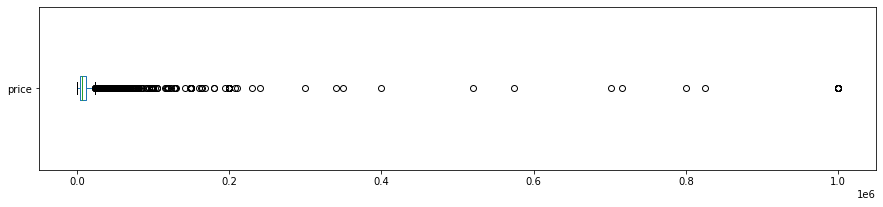


Cálculo de outliers para price
Limite superior: 24000.0
923 entradas
8.1624%


In [33]:
#plotar Boxplot price (outlier)
df["price"].plot(kind='box', vert=False, figsize=(15, 3));
plt.show()
#formula para cáclulo de outlier > 210 mil
q3_soma_iiq_price = df['price'].quantile(.75) + 1.5*(df['price'].quantile(.75) - df['price'].quantile(.25))
print("\nCálculo de outliers para price")
print("Limite superior: {}".format(q3_soma_iiq_price))
print("{} entradas".format(len(df[df.price > q3_soma_iiq_price])))
print("{:.4f}%".format((len(df[df.price > q3_soma_iiq_price]) / df.shape[0])*100))

#### Boxplot para availability_365

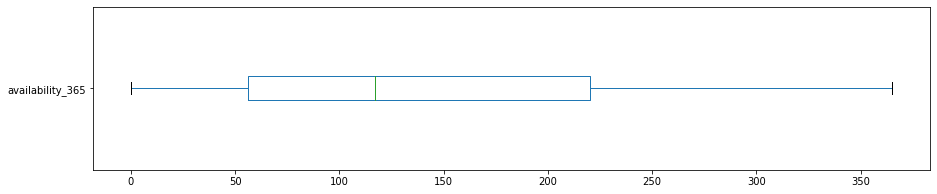

In [34]:
#plotar Boxplot availability_365
df['availability_365'].plot(kind='box', vert=False, figsize=(15, 3));
plt.show()

#### Boxplot para minimum_nights

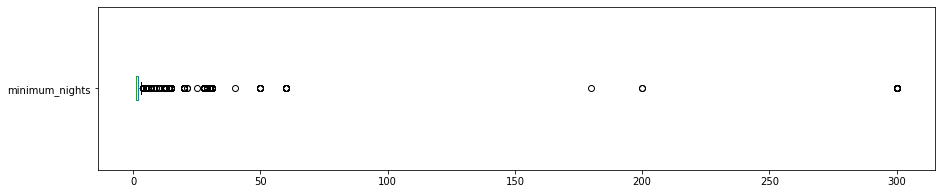

In [35]:
#plotar Boxplot minimum_nights (outlier > 40)
df["minimum_nights"].plot(kind='box', vert=False, figsize=(15, 3));
plt.show()

#### Boxplot para number_of_reviews

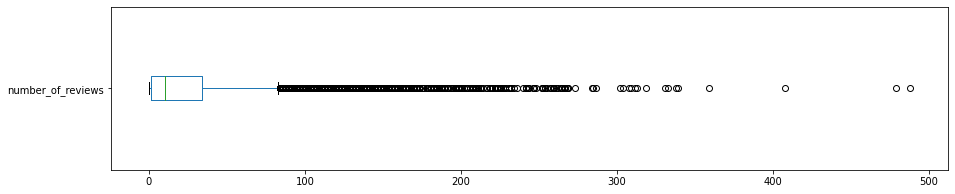

In [36]:
#plotar Boxplot number_of_reviews (oulier >280)
df["number_of_reviews"].plot(kind='box', vert=False, figsize=(15, 3));
plt.show()

#### Boxplot para calculated_host_listings_count

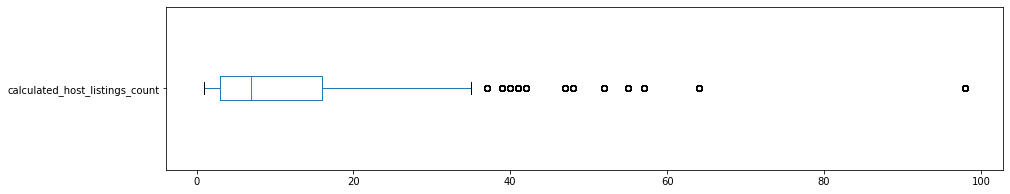

In [37]:
#plotar Boxplot calculated_host_listings_count
df["calculated_host_listings_count"].plot(kind='box', vert=False, figsize=(15, 3));
plt.show()

#### Otimização do DataFrame

Após a identificação dos outlier no DataFrame original, faremos uma cópia e otimização deste nova DataFrame criado para que a análise possa continuar.

In [38]:
#criar novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean["price"] > 240000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean["number_of_reviews"] > 280].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean["minimum_nights"] > 40].index, axis=0, inplace=True)
# remover valores = 0
df_clean.drop(df_clean[df_clean["price"] == 0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean["availability_365"] == 0].index, axis=0, inplace=True)

In [39]:
# Resumo estatiscio sem oulier
df_clean[["availability_365", "calculated_host_listings_count", "number_of_reviews", "minimum_nights", "price"]].describe()

,availability_365,calculated_host_listings_count,number_of_reviews,minimum_nights,price
count,9962.000000,9962.000000,9962.000000,9962.000000,9962.000000
mean,161.843305,12.745633,25.936459,2.666834,10662.458041
std,109.553687,14.828611,39.566843,5.335743,14954.735119
min,1.000000,1.000000,0.000000,1.000000,820.000000
25%,80.000000,3.000000,1.000000,1.000000,4000.000000
50%,143.000000,8.000000,10.000000,1.000000,6500.000000
75%,248.000000,17.000000,34.000000,2.000000,11800.000000
max,365.000000,98.000000,273.000000,40.000000,230000.000000


#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price`, `number_of_reviews` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

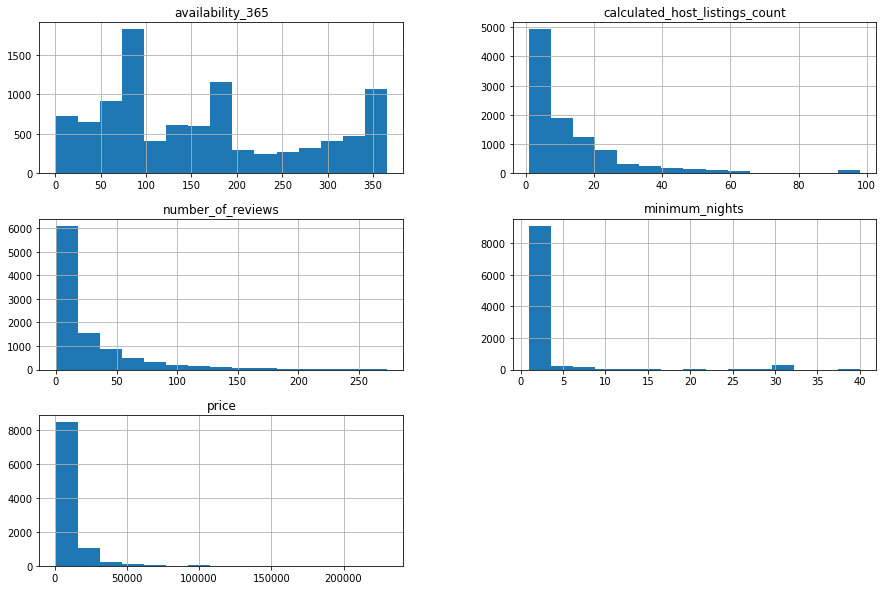

In [40]:
#histograma DataFrame Df_Clean
df_clean[["availability_365", "calculated_host_listings_count", "number_of_reviews", "minimum_nights", "price"]].hist(bins=15, figsize=(15, 10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [55]:
# Matriz de correlação entre variáveis
corr = df_clean[["availability_365", "calculated_host_listings_count", "number_of_reviews", "minimum_nights", "price"]].corr()
display(corr)

,availability_365,calculated_host_listings_count,number_of_reviews,minimum_nights,price
availability_365,1.000000,0.090002,0.020568,-0.011306,0.029465
calculated_host_listings_count,0.090002,1.000000,-0.163434,-0.034068,-0.096387
number_of_reviews,0.020568,-0.163434,1.000000,-0.052790,-0.016907
minimum_nights,-0.011306,-0.034068,-0.052790,1.000000,-0.023263
price,0.029465,-0.096387,-0.016907,-0.023263,1.000000


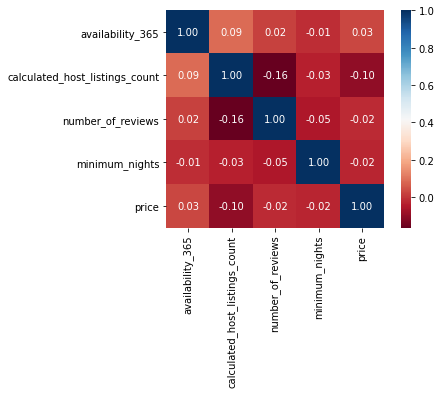

In [42]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [56]:
# Quantidade de imóveis
df_clean["room_type"].value_counts().sort_values(ascending=False)

Entire home/apt    7079
Private room       2157
Hotel room          392
Shared room         334
Name: room_type, dtype: int64

In [57]:
#Porcentagem de tipo de Imóveis
(df_clean["room_type"].value_counts() / df_clean.shape[0]).sort_values(ascending=False)

Entire home/apt    0.710600
Private room       0.216523
Hotel room         0.039350
Shared room        0.033527
Name: room_type, dtype: float64

In [45]:
df_clean.neighbourhood.unique()

array(['Sumida Ku', 'Kita Ku', 'Setagaya Ku', 'Adachi Ku', 'Shinjuku Ku',
       'Shibuya Ku', 'Meguro Ku', 'Toshima Ku', 'Koto Ku', 'Shinagawa Ku',
       'Minato Ku', 'Suginami Ku', 'Akishima Shi', 'Bunkyo Ku',
       'Taito Ku', 'Itabashi Ku', 'Arakawa Ku', 'Machida Shi',
       'Higashimurayama Shi', 'Chuo Ku', 'Nerima Ku', 'Kokubunji Shi',
       'Hino Shi', 'Mitaka Shi', 'Nakano Ku', 'Hachioji Shi',
       'Katsushika Ku', 'Edogawa Ku', 'Musashino Shi', 'Koganei Shi',
       'Ota Ku', 'Akiruno Shi', 'Chiyoda Ku', 'Fuchu Shi', 'Fussa Shi',
       'Komae Shi', 'Chofu Shi', 'Tama Shi', 'Nishitokyo Shi',
       'Hinohara Mura', 'Ome Shi', 'Kunitachi Shi', 'Kodaira Shi',
       'Okutama Machi', 'Hamura Shi', 'Tachikawa Shi',
       'Musashimurayama Shi', 'Inagi Shi'], dtype=object)

In [46]:
#Quantidade de imóveis por localização
df_clean.neighbourhood.value_counts()

Shinjuku Ku            1950
Taito Ku               1465
Sumida Ku               972
Toshima Ku              886
Shibuya Ku              596
Minato Ku               434
Ota Ku                  420
Chuo Ku                 390
Nakano Ku               280
Katsushika Ku           277
Setagaya Ku             246
Kita Ku                 244
Arakawa Ku              232
Suginami Ku             209
Shinagawa Ku            200
Koto Ku                 174
Itabashi Ku             158
Edogawa Ku              153
Chiyoda Ku              149
Bunkyo Ku               125
Adachi Ku               107
Nerima Ku                61
Meguro Ku                47
Hachioji Shi             26
Hino Shi                 17
Machida Shi              16
Nishitokyo Shi           13
Tama Shi                 10
Akiruno Shi              10
Kokubunji Shi             9
Chofu Shi                 9
Musashino Shi             8
Higashimurayama Shi       8
Mitaka Shi                8
Kunitachi Shi             7
Kodaira Shi         

In [47]:
#Quantidade de imóveis por localização (Porcentagem)
(df_clean.neighbourhood.value_counts() / df_clean.shape[0]).sort_values(ascending=False)

Shinjuku Ku            0.195744
Taito Ku               0.147059
Sumida Ku              0.097571
Toshima Ku             0.088938
Shibuya Ku             0.059827
Minato Ku              0.043566
Ota Ku                 0.042160
Chuo Ku                0.039149
Nakano Ku              0.028107
Katsushika Ku          0.027806
Setagaya Ku            0.024694
Kita Ku                0.024493
Arakawa Ku             0.023288
Suginami Ku            0.020980
Shinagawa Ku           0.020076
Koto Ku                0.017466
Itabashi Ku            0.015860
Edogawa Ku             0.015358
Chiyoda Ku             0.014957
Bunkyo Ku              0.012548
Adachi Ku              0.010741
Nerima Ku              0.006123
Meguro Ku              0.004718
Hachioji Shi           0.002610
Hino Shi               0.001706
Machida Shi            0.001606
Nishitokyo Shi         0.001305
Tama Shi               0.001004
Akiruno Shi            0.001004
Kokubunji Shi          0.000903
Chofu Shi              0.000903
Musashin

### **Q6. Qual a localidade mais cara de Tokyo?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [58]:
#localidade mais cara
df_clean.groupby(["neighbourhood"])["price"].mean().sort_values(ascending=False)[:5]

neighbourhood
Hinohara Mura    27471.400000
Suginami Ku      20423.880383
Okutama Machi    17333.333333
Komae Shi        16782.250000
Fuchu Shi        16388.600000
Name: price, dtype: float64

Acima, vemos que bairros como Hinohara Mura, Suginami Ku e Okutama Machi, estão com média de preço superior a de lugares como Komae Shi e Fuchu Shi

Abaixo podemos ver que Hinohara Mura se mostra o bairro mais caro pela quantidade de imoóveis e valores de diárias.

In [50]:
#motivo de ser a mais cara 
df_clean[df_clean['neighbourhood']== 'Hinohara Mura']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
959,16874184,東京の秘境 檜原村の絶景古民家カフェ Cafe stay in wilderness Tokyo,1932364,Naohiro,NaN,Hinohara Mura,35.72494,139.16192,Private room,5000,1,45,2020-02-23,0.94,1,147
961,16901092,ふれあい広場 The only village in Tokyo Glamping siteA,22738066,Norukiajapan,NaN,Hinohara Mura,35.74234,139.12936,Entire home/apt,34000,1,17,2019-02-15,0.37,3,69
1174,19438986,ふれあい広場 The only village inTokyo Glamping siteB,22738066,Norukiajapan,NaN,Hinohara Mura,35.74195,139.13132,Entire home/apt,23000,1,18,2018-07-16,0.43,3,62
5799,36180401,【オープン記念価格】都心から90分 5000坪の敷地に1棟だけ。ここは、宿泊できる映画館,267734414,大智,NaN,Hinohara Mura,35.73988,139.10705,Entire home/apt,46857,1,15,2021-02-21,2.24,1,252
7434,40262650,ふれあい広場The only villagein Tokyo Glamping site C,22738066,Norukiajapan,NaN,Hinohara Mura,35.74276,139.13021,Private room,28500,1,0,NaN,NaN,3,61


#### Curiosidade sobre Hinohara Mura
Hinohara Mura é um pequeno vilarejo que  fica aproximadamente a 66,4 km a oeste de Tokyo.

Um vilarejo repleto de cachoeiras, trilhas pelas montanhas, templos e parques.

Um vilarejo que possui o moderno e o tradicinonal como encontrado em todo o Japão, mas sendo um local com menor volume de pessoas.

In [51]:
# localidade mais barata
df_clean.groupby(["neighbourhood"])["price"].mean().sort_values()[:5]

neighbourhood
Inagi Shi              1700.000000
Musashimurayama Shi    3000.000000
Fussa Shi              3300.000000
Akishima Shi           3854.000000
Kunitachi Shi          4057.142857
Name: price, dtype: float64

In [52]:
df_clean[df_clean['neighbourhood']== 'Inagi Shi']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3282,29569166,Room4 for woman.30 min to Shinjuku station. 女性専用,118284184,Guest House,NaN,Inagi Shi,35.63312,139.51436,Private room,1700,30,7,2020-05-04,0.29,1,90


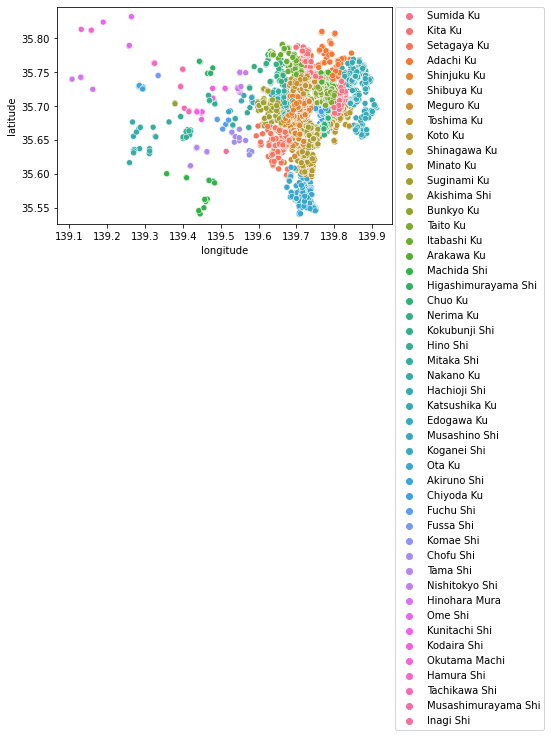

In [59]:
# Qauntidade de imóveis por região (neighbourhood)
sns.scatterplot(y="latitude", x="longitude", hue="neighbourhood", data=df_clean,alpha= (1));
#legenda a direita
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0);



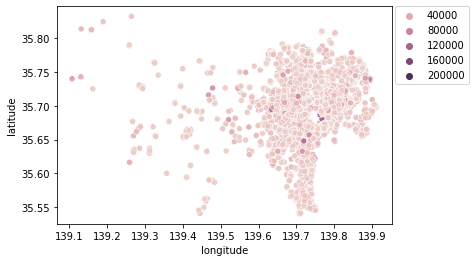

In [53]:
#plot de preços tokyo
sns.scatterplot(y="latitude", x="longitude", hue="price", data=df_clean,alpha= (1));
#legenda a direita
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0);

## Conclusões

A análise feita com a base de dados do Airbnb resumida, nos mostrou que haviam *outliers* em algumas variáveis.


Podemos notar que algumas localidades possui poucos imóveis e valores de 
diárias com valores que distorcem as informações estatísticas.


Podemos concluir que uma análise mais profunda com o *Dataset* completo, possuindo 106 atributos possa nos fornecer informações mais precisas.


